# EDA

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

*

https://docs.scipy.org/doc/scipy/reference/stats.html

*

https://numpy.org/doc/stable/reference/routines.statistics.html

* math

https://docs.python.org/ko/3/library/math.html#number-theoretic-and-representation-functions

## 위치 통계량

**산술평균**

In [3]:
x = [1,2,3,4,5]
np.mean(x)

3.0

In [4]:
np.array(x).mean()

3.0

In [5]:
pd.Series(x).mean()

3.000

교제 예제

In [7]:
df = pd.read_csv('./data/ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [8]:
df.shape

(50, 2)

In [12]:
# sum(), len() 함수를 이용하여 산술평균 계산
# 영어 과목의 평균 계산
sum(df['english'])/len(df['english'])

58.380

In [13]:
np.mean(df['english'])

58.380

In [14]:
df['english'].mean()

58.380

In [16]:
sp.mean(df['english'])

C:\Users\82103\AppData\Local\Temp/ipykernel_12756/2012453220.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(df['english'])


58.380

기하평균

In [17]:
data = [2, 8, 3]

In [18]:
# 일반 평균
np.mean(data)

4.333333333333333

In [19]:
# 기하 평균
math.prod(data)**(1/len(data))

3.634

In [20]:
gmean(data)

3.634241185664279

**조화평균**

In [23]:
# 조화평균 계산
data = np.array([80, 120])
1/data
len(data)/np.sum(1/data)

array([0.013, 0.008])

95.99999999999999

In [24]:
hmean(data)

95.99999999999999

가중평균

In [26]:
np.average(np.arange(1,5))
np.average(np.arange(1,11), weights=np.arange(10,0,-1))

2.5

4.0

In [27]:
np.mean(np.arange(1,11))

5.5

## 중앙값 (median)

In [28]:
scores=np.array(df['english'])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [29]:
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [30]:
# median 계산식
n = len(sorted_scores)
if n%2==0:
    x1 = sorted_scores[n//2-1]
    x2 = sorted_scores[n//2]
    median = (x1+x2)/2
else:
    median = sorted_scores[(n+1)//2-1]

median

57.5

In [31]:
sorted_scores[24], sorted_scores[25]

(57, 58)

In [32]:
np.median(scores)

57.5

In [33]:
df['english'].median()

57.500

절사 평균

In [34]:
np.random.seed(3)
income = np.random.normal(2000000, 500000, 100)
income[:10]

array([2894314.237, 2218254.925, 2048248.734, 1068253.648, 1861305.899,
       1822620.51 , 1958629.259, 1686499.662, 1978090.916, 1761390.985])

In [35]:
# 평균 소득
np.mean(income)

1945681.4627969689

In [37]:
# 소득이 10억인 사람 추가
income = np.append(income, 10**9)

In [38]:
np.mean(income)

11711453.296859775

In [39]:
np.median(income)

1910517.9894137066

절사 평균 계산

In [40]:
trim_mean(income, 0.2)

1934158.764258797

## 최빈값(mode)

In [42]:
np.random.seed(3)
data = np.random.choice(['A', 'B', 'C'], 1000)
# A,B,C라는 요소로 이루어진 데이터
data[:10]
len(data)

array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

1000

In [44]:
mode(data)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

In [45]:
# 최빈값
mode(data).mode

array(['A'], dtype='<U1')

In [46]:
# 최빈값의 빈도
mode(data).count

array([350])

In [47]:
pd.Series(data).value_counts()

A    350
B    328
C    322
dtype: int64

In [48]:
pd.Series(data).value_counts().index[0]
pd.Series(data).value_counts()[0]

'A'

350

예제 데이터 생성

In [49]:
np.random.seed(123)
data = np.random.normal(100,20,size=1000)
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [50]:
# 최소, 최대값
sorted(data)[0], sorted(data)[-1]

(35.37889984161376, 171.43158436052622)

In [51]:
np.min(data)
np.max(data)

35.37889984161376

171.43158436052622

## 사분위수 / 백분위수

- 자료를 크기 순으로 늘어 놓은 수 4등분하여 각각의 경계에 있는 수
    - 제1사분위수(하사분위수, Q1, the first quartile)
        - 자료의 ¼  또는 25%에 해당하는 값
        - 𝑄1=(𝑛+1)1/4=(𝑛+1)25/100 번째순위값 

    - 제2사분위수(중위수, Q2, the second quartile)
        - 자료의 2/4 또는 50%에 해당하는 값

    - 제3사분위수(상사분위수, Q3, the third quartile)
        - 자료의 ¾ 또는 75%에 해당하는 값
        - 𝑄3=(𝑛+1)3/4=(𝑛+1)75/100 번째순위값

In [53]:
# 제1사분위수(하사분위수, Q1)
np.percentile(data,25)

86.30886819268538

In [ ]:
# 제2사분위수(중위수, Q2)
np.percentile(data, 50)

In [54]:
# 제3사분위수(상사분위수, Q3)
np.percentile(data, 75)

113.37731495435875

### 5가 통계량

- 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
- 상자-수염그림(boxplot)
![](./img/사분위수.png)

{'whiskers': [<matplotlib.lines.Line2D at 0x2449119bd60>,
 'caps': [<matplotlib.lines.Line2D at 0x244911b7400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2449119b910>],
 'medians': [<matplotlib.lines.Line2D at 0x244911b7b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x244911b7eb0>],
 'means': []}

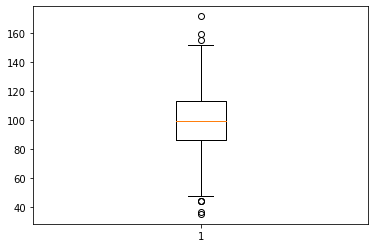

In [55]:
import matplotlib.pyplot as plt

plt.boxplot(data)

## 기술통계량 계산 함수 : describe()

- 관측값수, 범위, 평균, 분산, 왜도, 첨도 계산

- pandas.Series.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
- pandas.DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
- scipy.stats.describe(a[, axis, ddof=1, bias, nan_policy])

In [56]:
describe(data)
describe(df['english']) # 표본데이터의 기술통계량

DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=96.03632653061224, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

In [57]:
df['english'].describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [58]:
describe(df['english'], ddof=0) # 모집단 데이터의 기술통계량 ddof로 구분한다!

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=94.1156, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)